In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pandas_profiling

/Users/anthonyso/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/anthonyso/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import altair as alt

In [5]:
#alt.renderers.enable('notebook')
#alt.data_transformers.enable('default', max_rows=None)

In [6]:
truck_cycle = Path('data')/"Truck Cycle.csv"

In [7]:
parse_dates=['Date']
usecols= ['Date', 'Source bench', 'Truck', 'Travelling full duration', 'Payload', 'Full slope length',
         'Inpit Ramp length', 'Inpit Ramp Grade', 'Dump Ramp length', 'Dump Ramp Grade']
dtype= {'Date': 'object', 
        'Source bench': 'int', 
        'Truck': 'object', 
        'Travelling full duration': 'int', 
        'Payload': 'float', 
        'Full slope length': 'float',
        'Inpit Ramp length': 'float', 
        'Inpit Ramp Grade': 'object', 
        'Dump Ramp length': 'float', 
        'Dump Ramp Grade': 'object'}

In [8]:
df_truck_cycle = pd.read_csv(truck_cycle, parse_dates=parse_dates, usecols=usecols)

In [9]:
df_truck_cycle.head()

,Date,Source bench,Truck,Travelling full duration,Payload,Full slope length,Inpit Ramp length,Inpit Ramp Grade,Dump Ramp length,Dump Ramp Grade
0,2017-01-01,920,TRH402,1009,179.7,"3,888.21","3,108.02",9.34%,336.00,8.33%
1,2017-01-01,912,TRH402,1022,151.9,"4,542.65","3,263.69",9.14%,135.00,6.67%
2,2017-01-01,912,TRH402,1102,184.5,"5,300.56","3,263.69",9.14%,-,0.00%
3,2017-01-01,912,TRH402,1087,168.9,"5,335.41","3,263.69",9.14%,135.00,6.67%
4,2017-01-01,903,TRH402,1093,173.5,"5,662.90","3,362.25",9.14%,-,0.00%


In [10]:
df_truck_cycle['Inpit Ramp Grade'] = df_truck_cycle['Inpit Ramp Grade'].str.rstrip('%').astype('float') / 100.0
df_truck_cycle['Dump Ramp Grade'] = df_truck_cycle['Dump Ramp Grade'].str.rstrip('%').astype('float') / 100.0

In [11]:
df_truck_cycle['Dump Ramp length'] = df_truck_cycle['Dump Ramp length'].str.strip()
df_truck_cycle.loc[df_truck_cycle['Dump Ramp length'] == '-', 'Dump Ramp length'] = np.nan

In [12]:
df_truck_cycle['Full slope length'] = df_truck_cycle['Full slope length'].str.strip().str.replace(',', '').astype('float')
df_truck_cycle['Inpit Ramp length'] = df_truck_cycle['Inpit Ramp length'].str.strip().str.replace(',', '').astype('float')
df_truck_cycle['Dump Ramp length'] = df_truck_cycle['Dump Ramp length'].str.strip().str.replace(',', '').astype('float')

In [13]:
df_truck_cycle.loc[df_truck_cycle['Dump Ramp length'].isnull(), 'Dump Ramp length'] = 0
df_truck_cycle.loc[df_truck_cycle['Dump Ramp length'] == 0, 'Dump Ramp Grade'] = 0

In [14]:
df_truck_cycle['Truck'] = df_truck_cycle['Truck'].str.replace('TRH', '').astype('int')

In [15]:
df_truck_cycle.dtypes

Date                        datetime64[ns]
Source bench                         int64
Truck                                int64
Travelling full duration             int64
Payload                            float64
Full slope length                  float64
Inpit Ramp length                  float64
Inpit Ramp Grade                   float64
Dump Ramp length                   float64
Dump Ramp Grade                    float64
dtype: object

In [16]:
df_truck_cycle.describe()

,Source bench,Truck,Travelling full duration,Payload,Full slope length,Inpit Ramp length,Inpit Ramp Grade,Dump Ramp length,Dump Ramp Grade
count,78155.000000,78155.000000,78155.000000,78155.000000,78155.000000,78155.000000,78155.000000,78155.000000,78155.000000
mean,1001.667571,407.501196,954.078523,186.944066,4518.195990,2282.016594,0.091517,330.835877,0.054634
std,145.201252,4.648684,410.796120,13.266563,1622.824767,1577.278433,0.002580,336.512858,0.038417
min,867.000000,401.000000,0.000000,0.000000,4.100000,35.570000,0.082600,0.000000,0.000000
25%,893.000000,404.000000,523.000000,182.500000,3203.430000,157.890000,0.091400,0.000000,0.000000
50%,907.000000,407.000000,1091.000000,188.200000,4934.360000,3319.140000,0.091600,135.000000,0.083300
75%,1197.000000,410.000000,1221.000000,193.600000,5649.555000,3462.330000,0.091800,552.000000,0.083300
max,1209.000000,417.000000,10660.000000,309.100000,32051.860000,3729.830000,0.096000,1176.000000,0.100000


In [17]:
#profile1 = pandas_profiling.ProfileReport(df_truck_cycle)
#profile1

In [18]:
truck_spec = Path('data')/"Truck_Spec.csv"

In [19]:
df_truck_spec = pd.read_csv(truck_spec, usecols=['Truck ID', 'Empty Weight (kg)'])

In [20]:
df_truck_spec.head()

,Truck ID,Empty Weight (kg)
0,401,"124,114"
1,402,"114,114"
2,403,"124,114"
3,404,"124,114"
4,405,"124,114"


In [21]:
df = df_truck_cycle.merge(df_truck_spec, how='left', left_on='Truck', right_on='Truck ID', copy=False)

In [22]:
df.head()

,Date,Source bench,Truck,Travelling full duration,Payload,Full slope length,Inpit Ramp length,Inpit Ramp Grade,Dump Ramp length,Dump Ramp Grade,Truck ID,Empty Weight (kg)
0,2017-01-01,920,402,1009,179.7,3888.21,3108.02,0.0934,336.0,0.0833,402,"114,114"
1,2017-01-01,912,402,1022,151.9,4542.65,3263.69,0.0914,135.0,0.0667,402,"114,114"
2,2017-01-01,912,402,1102,184.5,5300.56,3263.69,0.0914,0.0,0.0000,402,"114,114"
3,2017-01-01,912,402,1087,168.9,5335.41,3263.69,0.0914,135.0,0.0667,402,"114,114"
4,2017-01-01,903,402,1093,173.5,5662.90,3362.25,0.0914,0.0,0.0000,402,"114,114"


In [23]:
df["Empty Weight (kg)"] = df["Empty Weight (kg)"].astype('category')

In [24]:
df.drop(['Truck', 'Truck ID'], axis=1, inplace=True)

In [25]:
df.head()

,Date,Source bench,Travelling full duration,Payload,Full slope length,Inpit Ramp length,Inpit Ramp Grade,Dump Ramp length,Dump Ramp Grade,Empty Weight (kg)
0,2017-01-01,920,1009,179.7,3888.21,3108.02,0.0934,336.0,0.0833,"114,114"
1,2017-01-01,912,1022,151.9,4542.65,3263.69,0.0914,135.0,0.0667,"114,114"
2,2017-01-01,912,1102,184.5,5300.56,3263.69,0.0914,0.0,0.0000,"114,114"
3,2017-01-01,912,1087,168.9,5335.41,3263.69,0.0914,135.0,0.0667,"114,114"
4,2017-01-01,903,1093,173.5,5662.90,3362.25,0.0914,0.0,0.0000,"114,114"


In [26]:
df['Source bench'].unique()

array([ 920,  912,  903,  916,  921,  911,  907,  925,  902,  898,  894,
        893,  889,  885,  884,  880,  876,  875, 1206, 1209, 1203,  867,
       1200, 1197, 1194, 1191, 1188])

## Remove Outliers: Travelling full duration

In [27]:
df.shape

(78155, 10)

In [28]:
df = df[df['Travelling full duration'] > 0]

In [29]:
df.shape

(78090, 10)

## Feature Engineering: Average Speed

In [30]:
df['average_speed'] = df['Full slope length'] / df['Travelling full duration'] * 3.6

## Remove Outliers: Average Speed

In [31]:
df = df[(df['average_speed'] >= 8) & (df['average_speed'] <= 34)]

In [32]:
df.shape

(76974, 11)

## Remove Outliers: Payload

In [33]:
df = df[(df['Payload'] > 100) & (df['Payload'] < 210)]

In [34]:
df.shape

(76464, 11)

## Feature Engineering: Flat Length

In [35]:
df['flat_length'] = df['Full slope length'] - (df['Inpit Ramp length'] + df['Dump Ramp length'])

In [36]:
df = df[df['flat_length'] >= 0]

In [37]:
df.shape

(75181, 12)

In [38]:
profile2 = pandas_profiling.ProfileReport(df)
profile2

Number of variables,13
Number of observations,75181
Total Missing (%),0.0%
Total size in memory,7.0 MiB
Average record size in memory,97.0 B
Numeric,11
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [39]:
df.to_csv('truck_merge.csv', index=False)

In [40]:
from fastai.imports import *
from fastai.structured import *

/Users/anthonyso/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/anthonyso/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/anthonyso/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/anthonyso/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [42]:
add_datepart(df, 'Date')

In [43]:
df.dtypes

Source bench                   int64
Travelling full duration       int64
Payload                      float64
Full slope length            float64
Inpit Ramp length            float64
Inpit Ramp Grade             float64
Dump Ramp length             float64
Dump Ramp Grade              float64
Empty Weight (kg)           category
average_speed                float64
flat_length                  float64
Year                           int64
Month                          int64
Week                           int64
Day                            int64
Dayofweek                      int64
Dayofyear                      int64
Is_month_end                    bool
Is_month_start                  bool
Is_quarter_end                  bool
Is_quarter_start                bool
Is_year_end                     bool
Is_year_start                   bool
Elapsed                        int64
dtype: object

In [44]:
df_trn, y_trn, nas = proc_df(df, 'Payload')

In [45]:
x_train, y_train = df_trn, y_trn

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
def print_score(m, x_train, y_train):
    y_pred = m.predict(x_train)
    res = {"R2 (train)": r2_score(y_train, y_pred), 
           "MSE (train)": mean_squared_error(y_train, y_pred)
          }
    for k, v in res.items():
        print(f'{k}: {v}')

In [52]:
m = RandomForestRegressor(n_jobs=-1, random_state=888, n_estimators=50)
%time m.fit(x_train, y_train)

CPU times: user 47 s, sys: 709 ms, total: 47.7 s
Wall time: 17.1 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=888, verbose=0, warm_start=False)

In [53]:
print_score(m, x_train, y_train)

R2 (train): 0.8777627136864528
MSE (train): 10.813935605337752


In [56]:
fi = rf_feat_importance(m, df_trn)
fi[:50]

,cols,imp
1,Travelling full duration,0.192402
8,average_speed,0.190200
9,flat_length,0.152058
2,Full slope length,0.140831
13,Day,0.056235
22,Elapsed,0.047889
15,Dayofyear,0.043670
14,Dayofweek,0.040514
5,Dump Ramp length,0.025641
7,Empty Weight (kg),0.021756


In [54]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

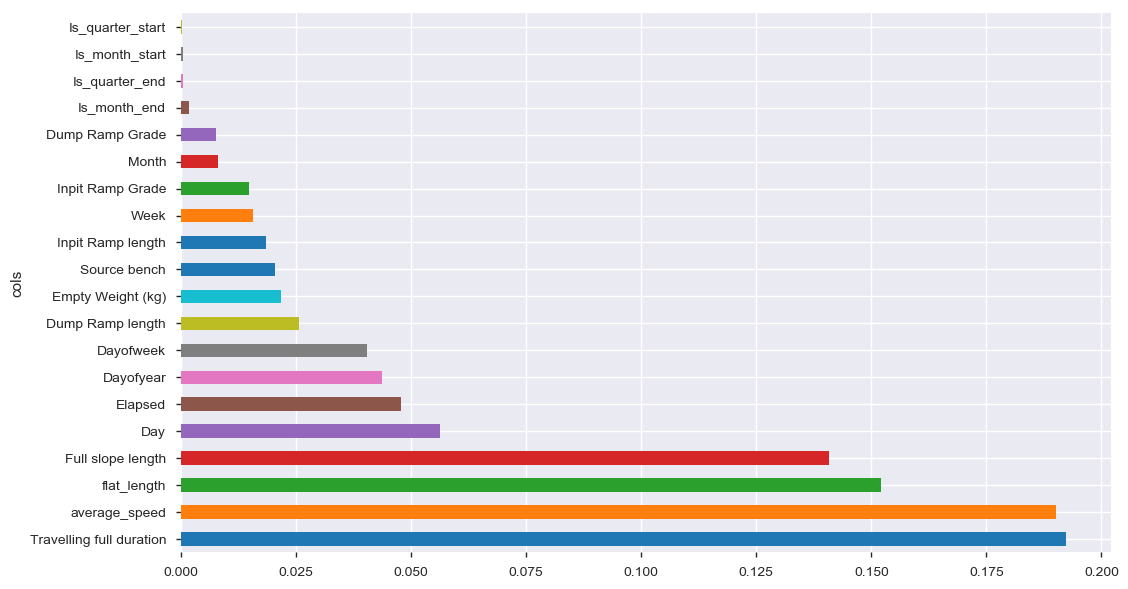

In [57]:
plot_fi(fi[:20])

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)

In [58]:
from sklearn.neural_network import MLPRegressor

In [61]:
nn_model = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 20), random_state=1)

In [62]:
nn_model.fit(x_train2, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [63]:
print_score(nn_model, x_train2, y_train)

R2 (train): 0.08795761700288951
MSE (train): 80.68542665264063
